**Libraries**

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

import cris_utils as cu
import data_processing as dp
import conv_deconv_blocks as cdb
import dcgan_model as md

**Tensorflow GPU Verification**

In [2]:
print("Versión de tensorflow: " + str(tf.__version__))
print("Comprobación de la GPU:",tf.config.experimental.list_physical_devices('GPU'))

Versión de tensorflow: 2.1.0
Comprobación de la GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# GAN

**Model Arquitecture**

In [3]:
N_H = 128
N_W = 128
N_C = 1

gen_deconvs = [(256,True,cdb.r_act,3,2),
               (128,True,cdb.r_act,3,2),
               (64,True,cdb.r_act,3,2),
               (32,True,cdb.r_act,3,2),
               (N_C,False,cdb.th_act,3,2)]

disc_convs = [(16,False,cdb.lr_act,3,2),
              (32,True,cdb.lr_act,3,2),
              (64,True,cdb.lr_act,3,2),
             (128,True,cdb.lr_act,3,2),
             (256,True,cdb.lr_act,3,2)]

n_deconv_ls = len(gen_deconvs)
n_conv_ls = len(disc_convs)

max_layers = cu.max_conv_deconv_layers(N_H)
assert (n_deconv_ls<=max_layers and n_conv_ls<=max_layers), "Incorrect number of layers for generator or discriminator"

config = {
    md.batch_size_k: 16,
    md.noise_shape_k: 128,
    
    md.adam_alpha_k: 1e-4,
    md.use_total_variation_k: True,
    md.lambda_total_variation_k: 0.5,
    
    md.checkpoints_folder_k: "./Checkpoints/",
    md.images_folder_k: "./Images/",
    md.num_rows_verification_k: 2,
    md.max_checkpoints_k: 2
}

hw_f_v = N_H/np.power(2,n_deconv_ls)
gen_config = {
    cdb.dec_den_info_k: ([hw_f_v,hw_f_v,256],False,cdb.r_act,(config[md.noise_shape_k],)),
    cdb.enc_dec_lys_info_k: gen_deconvs,
}

disc_config = {
    cdb.input_shape_k: (N_H,N_W,N_C),
    cdb.enc_dec_lys_info_k: disc_convs,
    cdb.enc_fin_den_len_k: 1
}

for H,W = 128, # deconv layers and # conv layers <= 7 

(# conv layers, heigh,width of last enc volume)
(# deconv layers, heigh,width of first dec volume)
[(1, 64), (2, 32), (3, 16), (4, 8), (5, 4), (6, 2), (7, 1)]


**Data Preparation**

In [4]:
FINGERPRINT_DATA_DIR = FINGERPRINT_DATA_DIR = "C:/Users/Y50/Documents/Universidad/Tesis/Datos_Huellas_PNG"
SHUFFLE_BUFFER_SIZE = 50

dp.show_folder_indexes(FINGERPRINT_DATA_DIR)

0 AdvanceSourceCode
1 FVC2006
2 FVC2006_Prueba
3 Matlab
4 SourceForge


Fingerprints Loaded: 1800 from: FVC2006
Batches Created: 113
shape of batch: (16, 128, 128, 1)


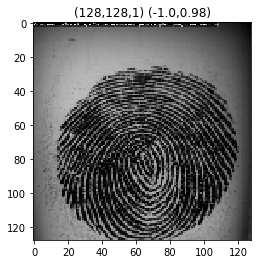

In [5]:
ds_data_dirs = dp.load_fp_dataset(FINGERPRINT_DATA_DIR,1,".png")
ds_data_dirs = dp.process_fp_dataset(ds_data_dirs,N_H,N_W,N_C,SHUFFLE_BUFFER_SIZE,config[md.batch_size_k])
cu.imshow(list(ds_data_dirs.as_numpy_iterator())[0][0,:])

**Creation of Model**

In [6]:
dcgan = md.DCGAN(gen_config,disc_config,config)

In [7]:
print(dcgan.generator.summary())
print(dcgan.discriminator.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4096)              528384    
_________________________________________________________________
re_lu (ReLU)                 (None, 4096)              0         
_________________________________________________________________
reshape (Reshape)            (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 8, 8, 256)         589824    
_________________________________________________________________
batch_normalization (BatchNo (None, 8, 8, 256)         1024      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 16, 16, 128)       2

**Training Configuration**

In [8]:
train_conf = {
    md.num_epochs_k: 150,
    md.dataset_k: ds_data_dirs,
    md.time_measures_k: 1,
    md.create_checkpoints_k: False,
    md.use_latest_checkpoint_k: False,
    md.percent_progress_savings_k: [50,100],
    md.num_images_k: 10
}

**Training**

Time for epoch 1 is 12.5 sec
Time for epoch 2 is 6.73 sec
Time for epoch 3 is 6.74 sec
Time for epoch 4 is 6.73 sec
Time for epoch 5 is 6.75 sec
Time for epoch 6 is 6.74 sec
Time for epoch 7 is 6.72 sec
Time for epoch 8 is 6.74 sec
Time for epoch 9 is 6.74 sec
Time for epoch 10 is 6.75 sec
Time for epoch 11 is 6.75 sec
Time for epoch 12 is 6.75 sec
Time for epoch 13 is 6.75 sec
Time for epoch 14 is 6.75 sec
Time for epoch 15 is 6.74 sec
Time for epoch 16 is 6.75 sec
Time for epoch 17 is 6.74 sec
Time for epoch 18 is 6.75 sec
Time for epoch 19 is 6.77 sec
Time for epoch 20 is 6.77 sec
Time for epoch 21 is 6.74 sec
Time for epoch 22 is 12.15 sec
Time for epoch 23 is 13.12 sec
Time for epoch 24 is 11.39 sec
Time for epoch 25 is 6.8 sec
Time for epoch 26 is 6.76 sec
Time for epoch 27 is 6.77 sec
Time for epoch 28 is 6.78 sec
Time for epoch 29 is 6.75 sec
Time for epoch 30 is 6.79 sec


C:\Users\Y50\Documents\Universidad\Tesis\Codigo\dcgan_model.py:139: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(self.num_rows_verification,self.num_rows_verification,im_index+1)


Time for epoch 31 is 11.24 sec
Time for epoch 32 is 13.1 sec
Time for epoch 33 is 13.21 sec
Time for epoch 34 is 9.62 sec
Time for epoch 35 is 6.74 sec
Time for epoch 36 is 6.74 sec
Time for epoch 37 is 6.76 sec
Time for epoch 38 is 6.84 sec
Time for epoch 39 is 14.05 sec
Time for epoch 40 is 14.75 sec
Time for epoch 41 is 11.52 sec
Time for epoch 42 is 6.82 sec
Time for epoch 43 is 6.77 sec
Time for epoch 44 is 6.87 sec
Time for epoch 45 is 9.48 sec
Time for epoch 46 is 13.67 sec
Time for epoch 47 is 14.38 sec
Time for epoch 48 is 8.22 sec
Time for epoch 49 is 6.78 sec
Time for epoch 50 is 6.8 sec
Time for epoch 51 is 6.78 sec
Time for epoch 52 is 9.91 sec
Time for epoch 53 is 13.7 sec
Time for epoch 54 is 13.51 sec
Time for epoch 55 is 13.32 sec
Time for epoch 56 is 7.12 sec
Time for epoch 57 is 6.77 sec
Time for epoch 58 is 6.77 sec
Time for epoch 59 is 6.77 sec
Time for epoch 60 is 6.77 sec
Time for epoch 61 is 11.73 sec
Time for epoch 62 is 13.31 sec
Time for epoch 63 is 13.33 sec

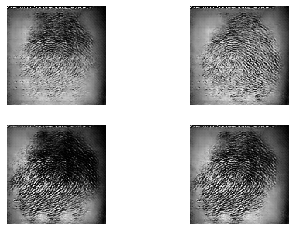

In [9]:
dcgan.train(train_conf)

**Code Testing**